# 2 ] 비지도 학습
## 1. 연관규칙학습 (패턴인식): 장바구니분석(Apriori, FP Growth, FPV, Eclat), 연관규칙, 서열분석 (순차패턴, 시차-연관분석; Sequence Analysis)

## 2. 주성분분석(Scree plot, 누적기여율, 주성분 별 가중치, Biplot) 및 요인분석
### 주성분분석이란?
- 고차원데이터를 저차원 데이터로 변형시키는 분석
 - 연관 가능성이 있는 고차원 공간의 표본들을 선형 연관성이 없는 저차원 공간의 표본으로 변환하기 위해 직교변환 함
 - 데이터를 한개의 축으로 사상시켰을때 그 분산이 가장 커지는 축을 첫번째 주성분 놓이도록 새로운 좌표계를 데이터로 선형 변환
 - 선형관계식을 통해 차수를 감소시켜 해석을 용이하게 하는데 목적있음
 
### 주성분분석 하는 이유?
- 차원 증가할수록 데이터 포인트간의 거리가 기하급수적으로 많아지게되고 sparse한 구조 가지게됨 
- 예측 신뢰도 떨어짐, 피쳐 많을 경우 개발 피쳐간에 상관관계가 높을 가능성 큼(다중공선성 문제로 모델 예측 성능 떨어짐)
- 피쳐 차원수 줄이면 직관적 데이터 해석가능, 
- 시각화 어려움, 학습 데이터 크기 줄어서 학습처리능력 증가


 - 차원축소 : 피쳐선택(feature selection) / 피쳐추출(feature extraction) :기존 피쳐를 저차원의 중요 피쳐로 압축하여 추출하는 것
 - PCA는 여러 속성의 값을 연산해야 하므로 속성의 스케일에 영향을 받음 ---> PCA전 스케일링 필요
 - 차원축소, 특성추출, 매니폴드학습, PCA, NMF

### 요인분석이란?
- 생성되는 변수의 수
    pca : 주성분이라고 하고 보통 2개 찾음
    fa : 몇개라고 지정할 수 없음. 데이터 의미에 따라 다름
- 생성되는 변수의 의미(이름)
    pca : 보통 2개 변수 채택, 첫번째는 제1주성분..
    fa : 분석가가 적절한 이름 붙여야함(자동적 이름 생성X)
- 생성된 변수들의 관계
    pca : 제 1주성분이 가장 중요
    fa : 새 변수들 대등한 관계(어떤 것이 더 중요하다 X)
- 분석방법의 의미
    pca : 목표변수 고려, 목표변수를 잘 예측/분류하기 위하여 원래 변수들의 선형 결합으로 이뤄진 몇개의 주성분을 찾아냄
    fa : 목표변수 고려X, 그냥 데이터가 주어지면 변수들을 비슷한 성격들로 묶어서 새로운 잠재변수를 만들어 냄
    

## 3. 군집분석
 - 계층적군집: 합병형 Bottom-up 방식(최단연결법, 평균연결법, 와드연결법, 최장연결밥, 중심연결법), 분리형 top-down 방식 (다이아나 방법), 덴드로그램
 - 분할적 군집(비계층적군집): 프로토타입 centroid-based (K-centroid 군집, K-means 군집, K-median 군집, K-medoid 군집, Fuzzy 군집), 분포기반GMM(혼합분포군집; EM알고리즘, 로그-가능도 함수), 밀도기반(중심밀도군집, DBSCAN, OPTICS, DENCLUE), 격자기반(STING, WaveCluster, CLIQUE)
 - 거리: 유클리디안 거리, 마할라노비스 거리, 체비셰프 거리, 맨하탄 거리, 캔버라 거리, 민코우스키 거리, 자카드 거리, 코사인 거리
 - SOM
 - 타당성지표: 실루엣 계수, Dunn Index
 
## 4. 사회연결망분석 (Social network)
 - 네트워크 구조 파악: 중심성, 밀도, 구조적틈새, 집중도 등
 - 커뮤니티 발견: walk trap, edge-betweenness
 - Giraph 등

## 2. 주성분분석(Scree plot, 누적기여율, 주성분 별 가중치, Biplot) 및 요인분석


In [ ]:
## 샘플 데이터셋 생성
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
irisDF = pd.DataFrame(iris.data, columns=columns)
irisDF['target'] = iris.target
irisDF.head()


# 1. 피쳐많으면 상관관계 있는지 보기(heatmap) --> 높은 상관도 가진 속성들은 소수의 pca 만으로도 모델 설명가능하므로
import seaborn as sns
corr = X_features.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, annot=True, fimt='.1g')


# 2. 전처리 - 스케일링 & 범주형 변수 라벨인코딩
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

for col in p_df.select_dtypes(include= object):
    lb = LabelEncoder()
    p_df[col] = lb.fit_transform(p_df[col])
    
mm = MinMaxScaler()
pca_df = pd.DataFrame(mm.fit_transform(p_df))
pca_df.columns = p_df.columns

# 3. PCA fitting
pca = PCA(n_components = 4)
pca.fit(pca_df)
print("고유값 : ", pca.sigular_values_)
print("분산설명력:", pca.explained_variance_ratio_)

# 누적합 구하려면
ratio = pd.DataFrame(pca.explained_variance_ratio_,columns =['ratio']) # 분산설명력
ratio['cumsum'] =ratio['ratio'].cumsum()
ratio.columns = ['variance_ratio','cumsum']
ratio.index = ['PC_' + str(i+1) for i in ratio.index]



# 4. Scree plot
import matplotlib.pyplot as plt

plt.title('Scree plot')
plt.xlabel('number of components')
plt.ylabel('cummulative explained variance')
plt.plot(pca.explainde_variance_ratio_, 'o-')
plt.show()


# 5. 새로운 데이터셋 생성
pca = PCA(n_components =2)
PComponets = pca.fit_tranform(x)
principal_iris = pd.DataFrame(data=PComponets, columns=['pc1','pc2'])

In [11]:
# 6. pca한 결과로 적합하기 -----> 수정
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf, iris.data, iris.target, scoring='accuracy', cv=3)


pca_X = irisDF_pca[['pca_component_1','pca_component_2']]
scores_pca = cross_val_score(rcf, pca_X, iris.target, scoring='accuracy', cv=3)

np.mean(scores), np.mean(scores_pca)

(0.96, 0.88)

## 2. 요인분석
https://zephyrus1111.tistory.com/462

In [92]:
import pandas as pd
# pip install factor-analyzer
from factor_analyzer import FactorAnalyzer

## 샘플 데이터셋 생성
df = pd.read_csv("C:/Users/LG/Desktop/python/bfi.csv")
df.drop(['gender','education','age'], axis=1, inplace=True)
df.dropna(inplace=True)
df.head(3)

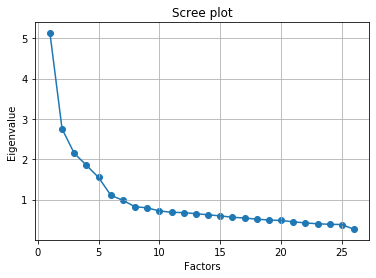

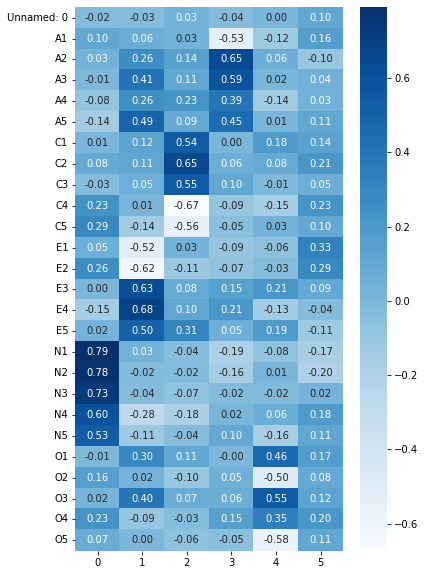

In [94]:
# 1. 요인성평가 : 분석수행전 데이터의 요인성 평가해야함. factorability는 데이터에서 요인찾을 수 있는지를 확인하ㅡㄴㄴ 것
# 인수분해성 or 샘플링 적절성을 확인하는 방법에는 두가지 방법있음

# bartlett 검정
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi, p_value = calculate_bartlett_sphericity(df)
chi, p_value
## p-value 0 이므로 탐색적 요인분석에 적합한 데이터로 봄

# 2. Kaiser-Meyer-Olkin(KMO) 검정
# 관측된 각 변수와 전체 모델에 대한 적절성 결정
# kmo는 관측된 모든 변수간의 분산 비율을 추정함
# 0.6미만의 kmo값 부적절, 0.8 이상이면 우수, kmo test하라면 변수 최소 3개이상

from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all, kmo_model = calculate_kmo(df)
kmo_model
## 0.8 이상이므로 우수

# 3. 요인수 선택
fa = FactorAnalyzer(n_factors=25, rotation=None)
fa.fit(df)
ev, v = fa.get_eigenvalues() # eigen 값 체크 : 각 요인으로 설명할 수 있는 변수들의 분산의 총합. 각 요인별로 모든 변수의 요인적재량을 제곱하여 더한 값(즉, 변수의 정보/분산이 어떤 요인에 의해 어느정도 표현되는지를 나타내주는 비율)

plt.scatter(range(1, df.shape[1]+1), ev)
plt.plot(range(1, df.shape[1]+1), ev)
plt.title('Scree plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

## eigen 값이 1이상일때까지 or 그래프 기울기 완만해지기 전까지 나누어야 데이터 결함 최소화
## 이 예시는 6이 적당

# 4. 탐색적 요인분석 실시
fa = FactorAnalyzer(n_factors=6, rotation='varimax') # 요인행렬 자체 해석하기 어려우므로 좌표 회전하여 각각의 좌표들에 최대한 근접하여 해석쉬어지도록 요인행렬을 좌표계 위에서 새롭게 생각한다는 의미
fa.fit(df)
efa_result = pd.DataFrame(fa.loadings_, index=df.columns) # 요인적재량: 각 변수와 요인간의 상관관계 정도(+/- 0.3 이상이면 유의)
efa_result

import seaborn as sns
plt.figure(figsize=(6,10))
sns.heatmap(efa_result, cmap='Blues', annot=True, fmt='.2f')

## 요인0은 N1-N5 에 대해 높은 요인 적재량 가짐
## 요인1은 E1-E5 높은 요인 적재량
## 요인5에는 변수에 대한 높은 요인 적재량이 없다고 해석가능, 따라서 위의 5가지 요소만 활용하는 게 좋음

# 5. 5개 요인으로 분석
fa = FactorAnalyzer(n_factors=5, rotation='varimax')
fa.fit(df)

fa.get_factor_variance()
df1 = pd.DataFrame(fa.get_factor_variance())
df1.index=['ss loadings', 'proportion var','cumulative var']

In [101]:
# 6. 신뢰도 계수(크론바흐 알파계수) 확인
def CronbachAlph(itemscores):
    itemscores = np.asarray(itemscores)
    itemvars = itemscores.var(axis=0, ddof=1)
    tscores = itemscores.sum(axis=1)
    nitems = itemscores.shape[1]
    return (nitems / (nitems-1))*(1-(itemvars.sum() / tscores.var(ddof=1)))

# 각 요인에 할당해놓은 문항들을 묶어서 신뢰도계수 확인
factors = ['A','C','E','N','O']
factors_items_dict = {}
for factor in factors:
    factors_items_dict[factor] = [x for x in df.columns if x[0] == factor]
    
factors_items_dict

for key, value in factors_items_dict.items():
    print(key)
    print(CronbachAlph(df[value]))
    print()
    
## N과 A정도가 신뢰도가 높다고 볼 수 있음

A
0.4437533019387808

C
-0.31628341382240494

E
-0.6552429584732491

N
0.8169468842774033

O
-0.176098107937655



## 3. 군집분석
### 1) K-means

In [108]:
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## 샘플 데이터셋 생성
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
irisDF = pd.DataFrame(iris.data, columns=columns)
irisDF['target'] = iris.target
irisDF.head()

# 1. k-means : 거리 기반 알고리즘으로 속성의 개수가 매우 많을 경우 군집화 정확도 떨어짐(pca로 차원 감소 해야 할 수도)
# 반복 수행하는데 반복 횟수 많을 경우 수행시간 매우 느림, 몇 개의 군집 선택 할지 가이드하기 어려움
kmeans = KMeans(n_clusters=3, max_iter=300, random_state=0)
kmeans.fit(irisDF)
irisDF['cluster'] = kmeans.labels_
iris_result = irisDF.groupby(['target','cluster']).count()
print(iris_result)


# 2. 군집화 평가 - 실루엣 계수 : 각 군집 간의 거리가 얼마나 효율적으로 분리돼 있는지를 나타냄
# 전체 실루엣 계수 평균값. 0~1사이값 가짐. 1가까울수록 좋음
# 개별 군집의 계수와 전체의 편차가 크지 않아야 함

from sklearn.metrics import silhouette_samples, silhouette_score

score_samples = silhouette_samples(iris.data, irisDF['cluster'])
irisDF['silhouette_coef'] = score_samples

average_score = silhouette_score(iris.data, irisDF['cluster'])
print('실루엣분석 score:{0:.3f}'.format(average_score))
irisDF.head()

# 각 클러스터별로 실루엣계수 확인해야 함
irisDF.groupby('cluster')['silhouette_coef'].mean()

                sepal_length  sepal_width  petal_length  petal_width
target cluster                                                      
0      1                  50           50            50           50
1      0                  50           50            50           50
2      0                   1            1             1            1
       2                  49           49            49           49
실루엣분석 score:0.511


,sepal_length,sepal_width,petal_length,petal_width,target,cluster,silhouette_coef
0,5.1,3.5,1.4,0.2,0,1,0.846713
1,4.9,3.0,1.4,0.2,0,1,0.807609
2,4.7,3.2,1.3,0.2,0,1,0.822507
3,4.6,3.1,1.5,0.2,0,1,0.796992
4,5.0,3.6,1.4,0.2,0,1,0.843070


In [27]:
# 군집 갯수에 따른 실루엣 계수 구하기 
visualize_silhouette([2,3,4,5], iris.data)

NameError: name 'visualize_silhouette' is not defined

In [ ]:
계층적군집: 합병형 Bottom-up 방식(최단연결법, 평균연결법, 와드연결법, 최장연결밥, 중심연결법), 분리형 top-down 방식 (다이아나 방법), 덴드로그램
분할적 군집(비계층적군집): 프로토타입 centroid-based (K-centroid 군집, K-means 군집, K-median 군집, K-medoid 군집, Fuzzy 군집), 분포기반GMM(혼합분포군집; EM알고리즘, 로그-가능도 함수), 밀도기반(중심밀도군집, DBSCAN, OPTICS, DENCLUE), 격자기반(STING, WaveCluster, CLIQUE)
거리: 유클리디안 거리, 마할라노비스 거리, 체비셰프 거리, 맨하탄 거리, 캔버라 거리, 민코우스키 거리, 자카드 거리, 코사인 거리
SOM
타당성지표: 실루엣 계수, Dunn Index

### 2) DBSCAN
- 특정공간 내에 데이터 밀도 차이를 기반 알고리즘으로 하고 있어 복잡한 기하학적 분포도를 가진 데이터에 대해서도 군집화 잘 수행

#### 군집방법 
- 포인트별로 입실론 주변 영역의 최소 데이터 개수(5개이상)포함 시 핵심포인트(core)가 되고 핵심포인트 끼리 직접 접근(입실론 범위 겹침)가능하면 군집합침
- 어떤 포인트가 핵심 포인트는 아니지만(입실론 반경 포인트 5개안됨) 이웃 데이터로 핵심포인트 가지고 있는 경우 경계포인트라고 하고 군집의 외곽 형성
    입실론 주변에 최소 데이터도 없고 핵심포인트도 이웃 데이터로 없는 경우를 잡음 포인트라고 함

#### 구성요소 설명
- 파라미터 : eps, min_samples
- 입실론 주변영역(eplison) : 개별 데이터를 중심으로 입실론 반경을 가지는 원형의 영역
- 최소 데이터 개수(min point) : 개별 데이터의 입실론 주변 영역에 포함되는 타 데이터의 개수
- 핵심 포인트(core point) : 주변 영역 내에 최소 데이터 개수 이상의 타 데이터를 가지고 있을 경우 해당 데이터를 핵심 포인트라 함
- 이웃 포인트(neighbor point) : 주변 영역 내에 위치한 타 데이터
- 경계 포인트(border point) : 주변 영역 내에 최소 데이터 개수 이상의 이웃 포인트를 가지고 있지 않지만 핵심 포인트를 이웃으로 가지고 있는 데이터
- 잡음 포인트(noise point) : 최소 데이터 개수 이상의 이웃 포인트를 가지고 있지 않으며, 핵심 포인트도 이웃 포인트로 가지고 있지 않는 데이터


In [114]:
# 1. DBSCAN
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.6, min_samples=8, metric='euclidean') # min_samples : 자신의 데이터 포함. 핵심 포인트 되기위한 입실론 반경 포함되어야 할 데이터 최소개수
dbscan_labels = dbscan.fit_predict(iris.data)
irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

## 군집 레이블 -1 : 노이즈에 속하는 군집 의미, 즉 위의 데이터는 0과 1로 군집형성
## dbscan은 군집 개수를 알고리즘에 따라 자동으로 지정함. 위의 데이터는 군집3개보다 2개하는것이 군집화 효율로 더 좋다고 판단


# 2. 시각화

from sklearn.decomposition import PCA
# 2차원으로 시각화하기 위해 pca n_component=2로 피쳐 데이터 세트 변환
pca = PCA(n_components=2, random_state=0)
pca_trans = pca.fit_transform(iris.data)

# visualize_cluser_2d()함수는 ftr1, ftr2 칼럼을 좌표에 표현하므로 pca변환값을 해당 칼럼으로 생성
irisDF['ftr1'] = pca_trans[:,0]
irisDF['ftr2'] = pca_trans[:,1]

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
        -1                 4
2        1                42
        -1                 8
Name: dbscan_cluster, dtype: int64


NameError: name 'visualize_cluster_plot' is not defined

In [ ]:

입력 데이터의 공분산행렬을 고유값 분해 -> 고유벡터에 입력 데이터를 선형 변환하는 것, 이 고유벡터가 pca의 주성분벡터로서 입력 데이터의 분산이 큰 방향을 나타냄
고유값(eigenvalue) : 고유벡터의 크기 나타내며 입력 데이터의 분산 나타냄

선형변환? 특정 벡터에 행렬A를 곱해 새로운 벡터로 변환하는 것 의미(= 특정 벡터를 하나의 공간에서 다른 공간으로 투영하는 개념, 행렬=공간으로 가정)

분산 : 한개의 특정변수의 데이터 변동의미
공분산 : 두 변수간의 변동의미
공분산 행렬 : 여러 변수와 관련된 공분산을 포함하는 정방형 행렬
공분산 행렬에서 대각선 원소는 각 변수의 분산 의미. 대각선 이외 원소는 가능한 모든 변수 쌍 간의 공분산
고유벡터 : 행렬 A를 곱해도 방향이 변하지 않고 크기만 변하는 벡터 말함(즉, Ax=ax, A:행렬, x:고유벡터, a:스칼라값)
고유벡터는 행렬이 작용하는 힘의 방향과 관계가 있어서 행렬을 분해하는 데 사용됨

공분산 행렬 = 정방행렬(열과 행이 같은 행렬, sqaure matrix) = 대칭행렬(정방행렬 중 대각원소 중심으로 원소 값이 대칭되는 행렬, symmetric matrix)
대칭행렬은 항상 고유벡터를 직교행렬로 고유값을 정방 행렬로 대각화할 수 있다는 것

공분산 = 고유벡터 직교행렬 * 고유값 정방행렬 * 고유벡터 직교행렬의 전치행렬 로 분해